# In this workbook we will explore creating charts using Matplotlib
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

[Anatomy of a figure](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)

![image](image.png)


**Color selector**

https://matplotlib.org/stable/gallery/color/named_colors.html

https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading the datase**t

In [2]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

Observe the dataset
- head
- shape
- info
- isna
- describe

In [3]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
data.shape

(374, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**Count of records by Occupation**

In [8]:
# Count of records by Occupation

data_occupation_count = data['Occupation'].value_counts().reset_index(name="Count")
data_occupation_count.rename(columns = {"index":"Occupation"}, inplace = True)

In [9]:
data_occupation_count

,Occupation,Count
0,Nurse,73
1,Doctor,71
2,Engineer,63
3,Lawyer,47
4,Teacher,40
5,Accountant,37
6,Salesperson,32
7,Software Engineer,4
8,Scientist,4
9,Sales Representative,2


## Create a barplot highlighting the following
- labels
- size of figure
- background color
- Title
- xlabel
- ylabel
- xticks
- ytics
- Adding horizontal line
- Adding vertical line

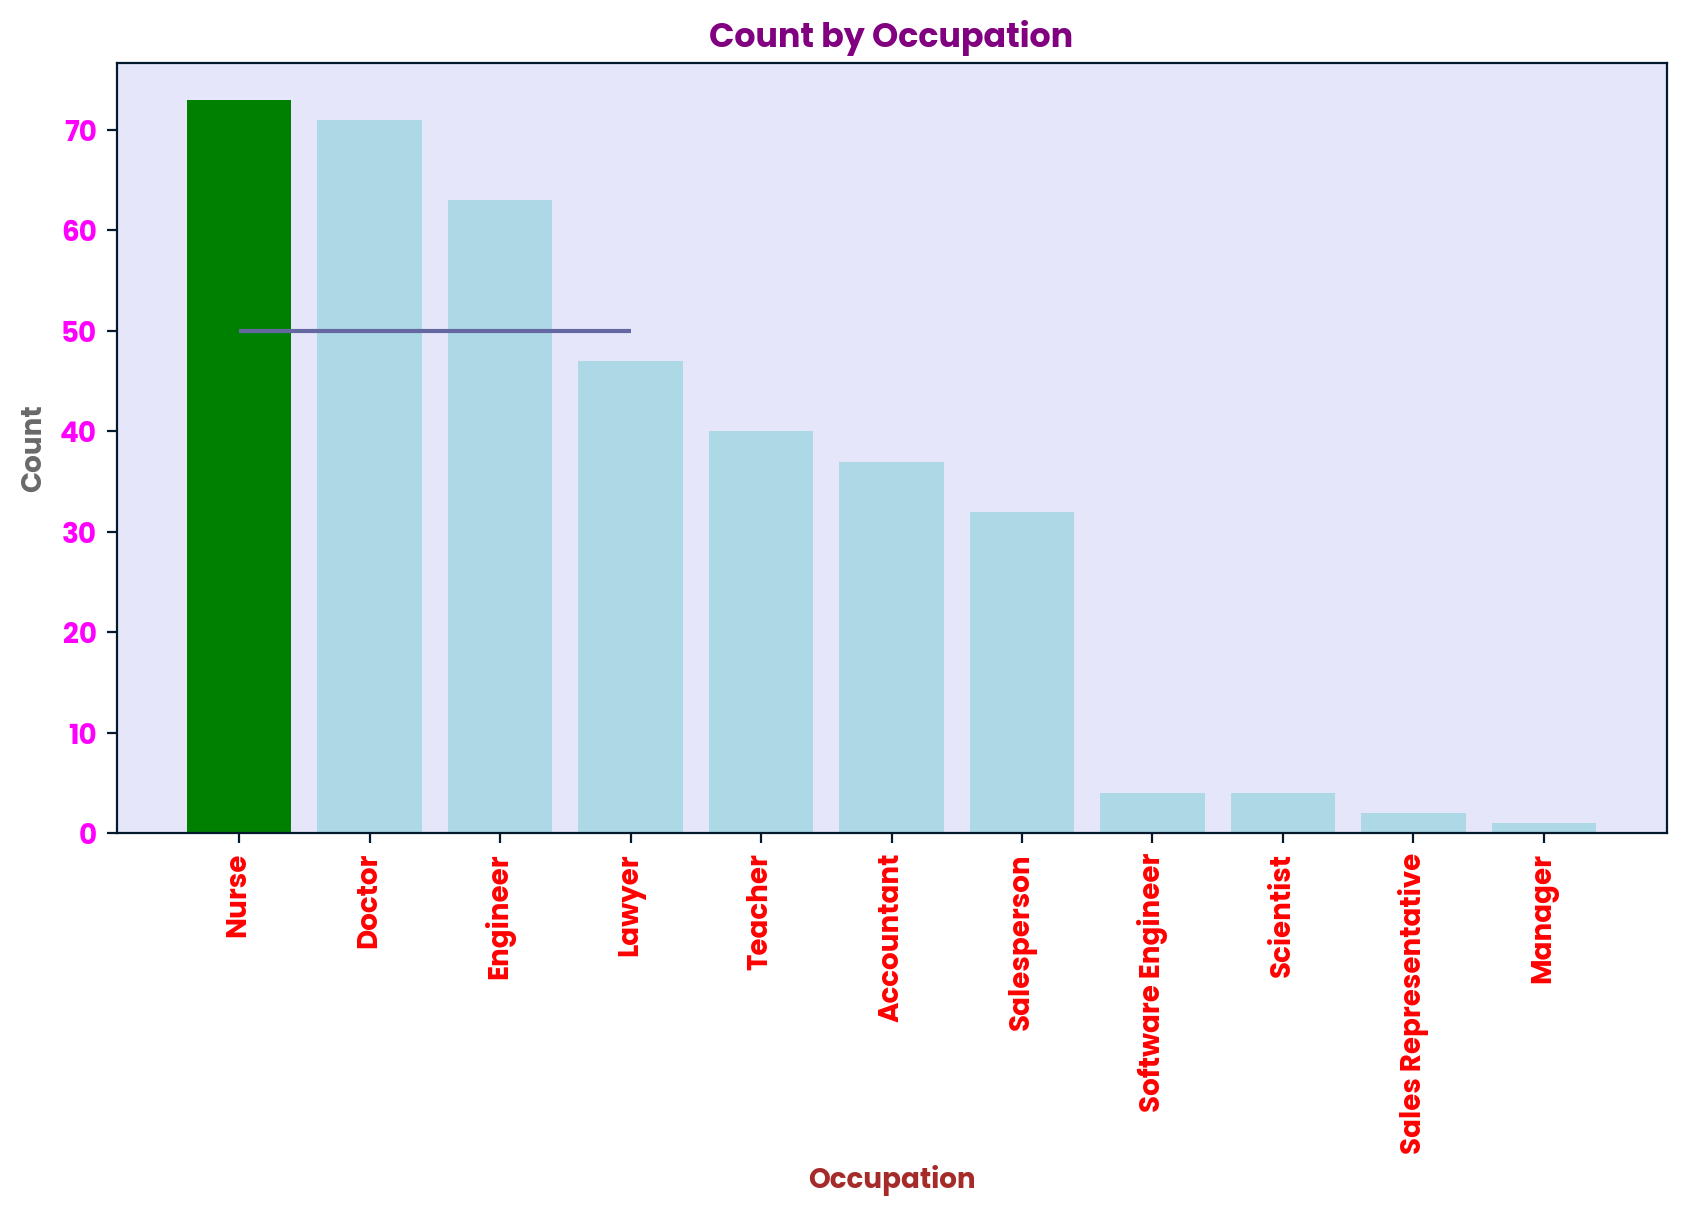

In [18]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        # y[i]/2 add the text at middle of the bar
        # ha keeps it in center
        # bbox creates a box around the text
        plt.text(i, y[i]/2, y[i], ha = 'center', bbox = dict(facecolor = 'red', alpha =.5))
                 
# specifying the plot size and background color        
plt.figure(figsize = (10,5))
plt.gca().set_facecolor("lavender")

# creating the barplot
plt.bar(data_occupation_count.Occupation, data_occupation_count.Count, 
        # creare an array of color with first as green and rest of the color as lightblue
        color = np.append(["green"], (np.repeat("lightblue", 10))))

# adding labels
##addlabels(data_occupation_count.Occupation, data_occupation_count.Count)

# giving title to the plot
plt.title("Count by Occupation", weight = "bold", color = "purple")
     
# giving X and Y labels
plt.xlabel("Occupation", weight = "bold", color = "brown")
plt.ylabel("Count", weight = "bold", color = "dimgrey")

# Modifying the ticks
plt.xticks(rotation = 90, color = "red", weight = "bold")
plt.yticks(color = "magenta", weight = "bold")

# Adding lines
# horizontal line
##plt.axhline(y=60, color='b', linestyle='-')
plt.hlines(y=50, xmin="Nurse", xmax = "Lawyer") # Other way to add a horizontal line
# vertical line
##plt.axvline("Doctor")
#plt.vlines("Doctor", ymin=0, ymax=100) # Other way to add a vertical line
     
# visualizing the plot
plt.show()

## Create a barplot with side by side number for Male and Female

In [11]:
# Summarising the data with separate column for Female & Male

data_summ = data.groupby(['Occupation', 'Gender'])['Person ID'].agg('count')
data_summ = data_summ.unstack().reset_index()

data_summ

Gender,Occupation,Female,Male
0,Accountant,36.0,1.0
1,Doctor,2.0,69.0
2,Engineer,32.0,31.0
3,Lawyer,2.0,45.0
4,Manager,1.0,NaN
5,Nurse,73.0,NaN
6,Sales Representative,NaN,2.0
7,Salesperson,NaN,32.0
8,Scientist,4.0,NaN
9,Software Engineer,NaN,4.0


**_Using Matplotlib_**

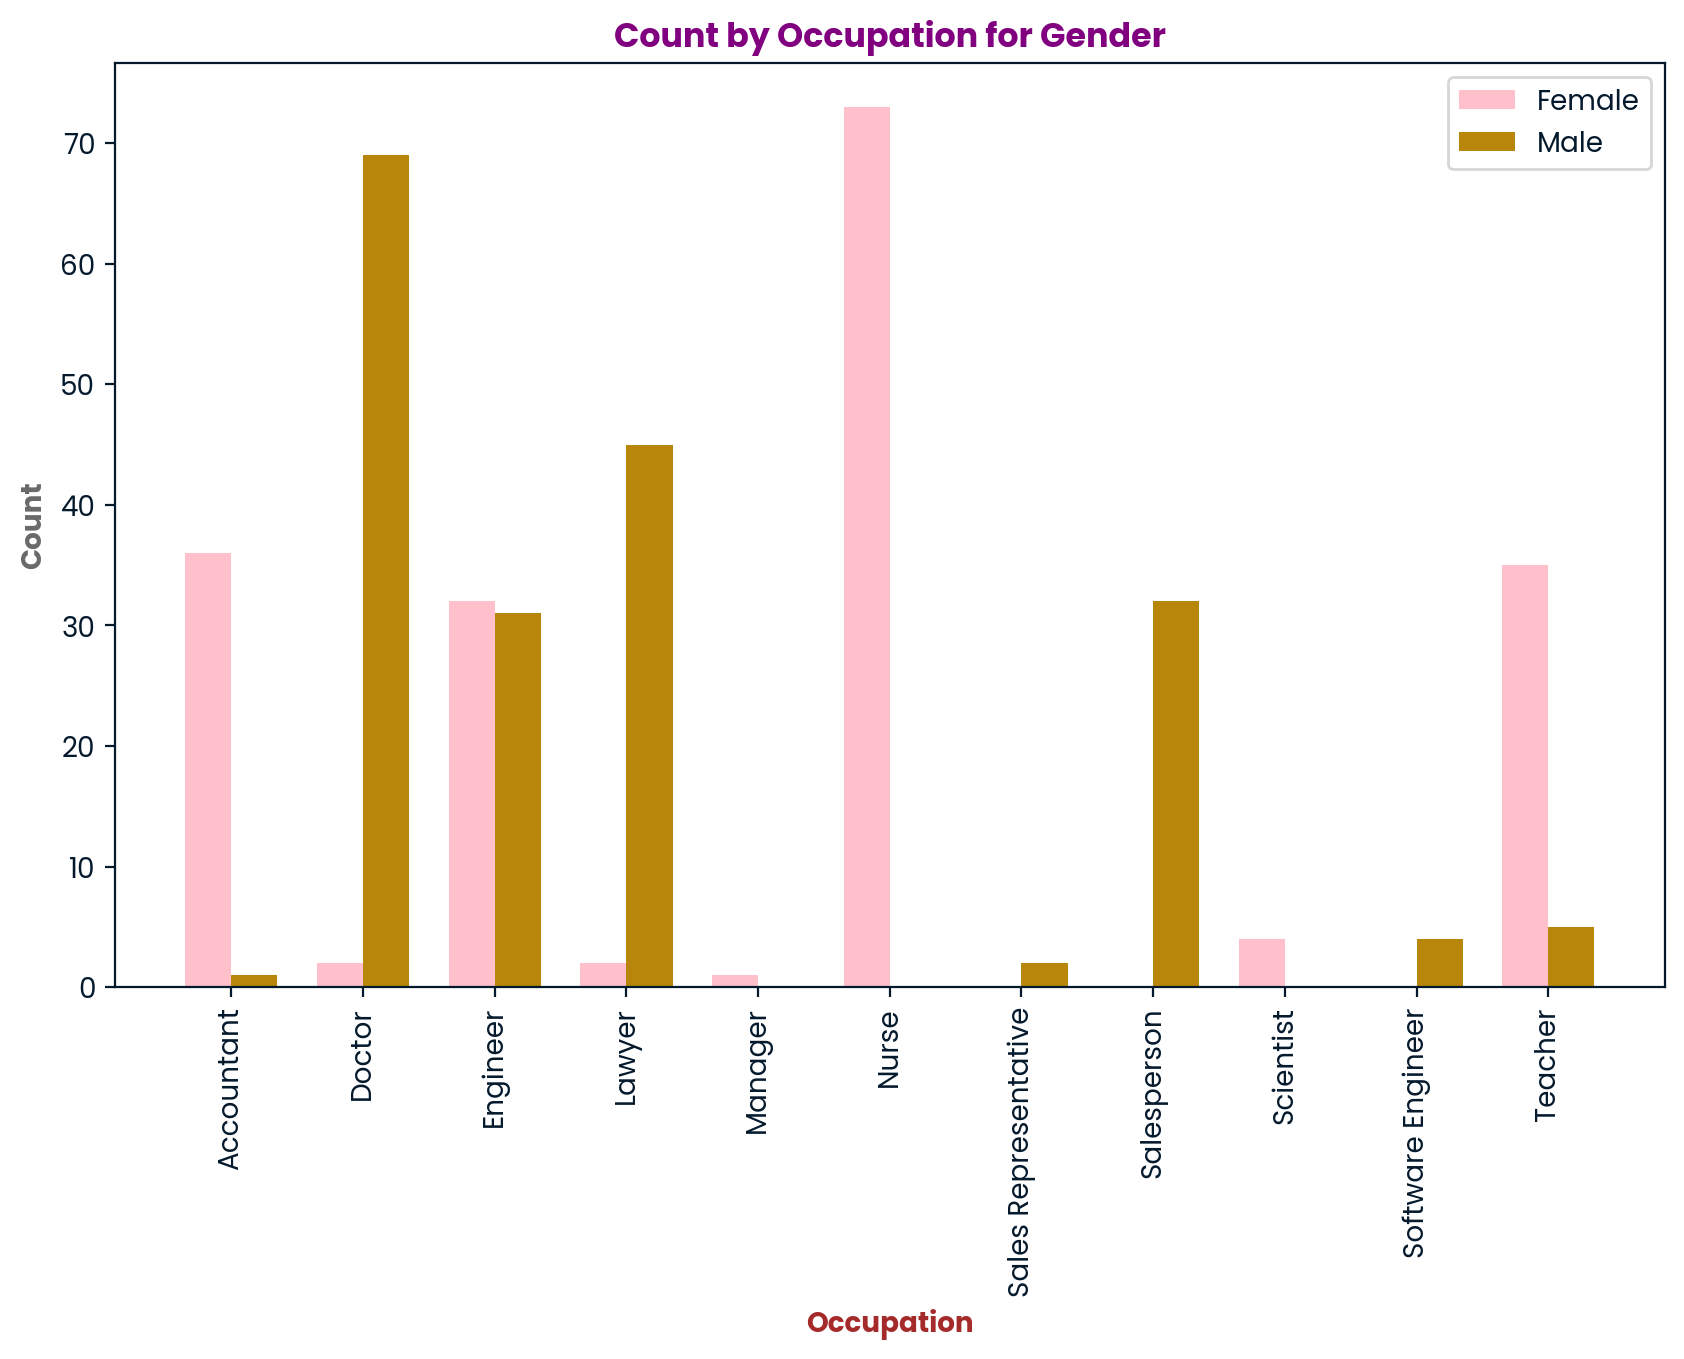

In [12]:
# Create a bar plot with side-by-side bars using matplotlib
bar_width = 0.35
index = np.arange(len(data_summ.Occupation))

plt.figure(figsize=(10, 6))
# Adding first bar
plt.bar(index, data_summ.Female, width=bar_width, label='Female', color='pink')
# Second bar are added at a space of bar_width
plt.bar(index + bar_width, data_summ.Male, width=bar_width, label='Male', color='darkgoldenrod')

# giving title to the plot
plt.title("Count by Occupation for Gender", weight = "bold", color = "purple")
 
# giving X and Y labels
plt.xlabel("Occupation", weight = "bold", color = "brown")
plt.ylabel("Count", weight = "bold", color = "dimgrey")

# Show the legend
plt.legend()

# Adjust the x-axis ticks and labels
plt.xticks(index + bar_width / 2, data_summ.Occupation, rotation = 90)

# Show the plot
plt.show()

## Create a barplot with stacked numbers for Male and Female

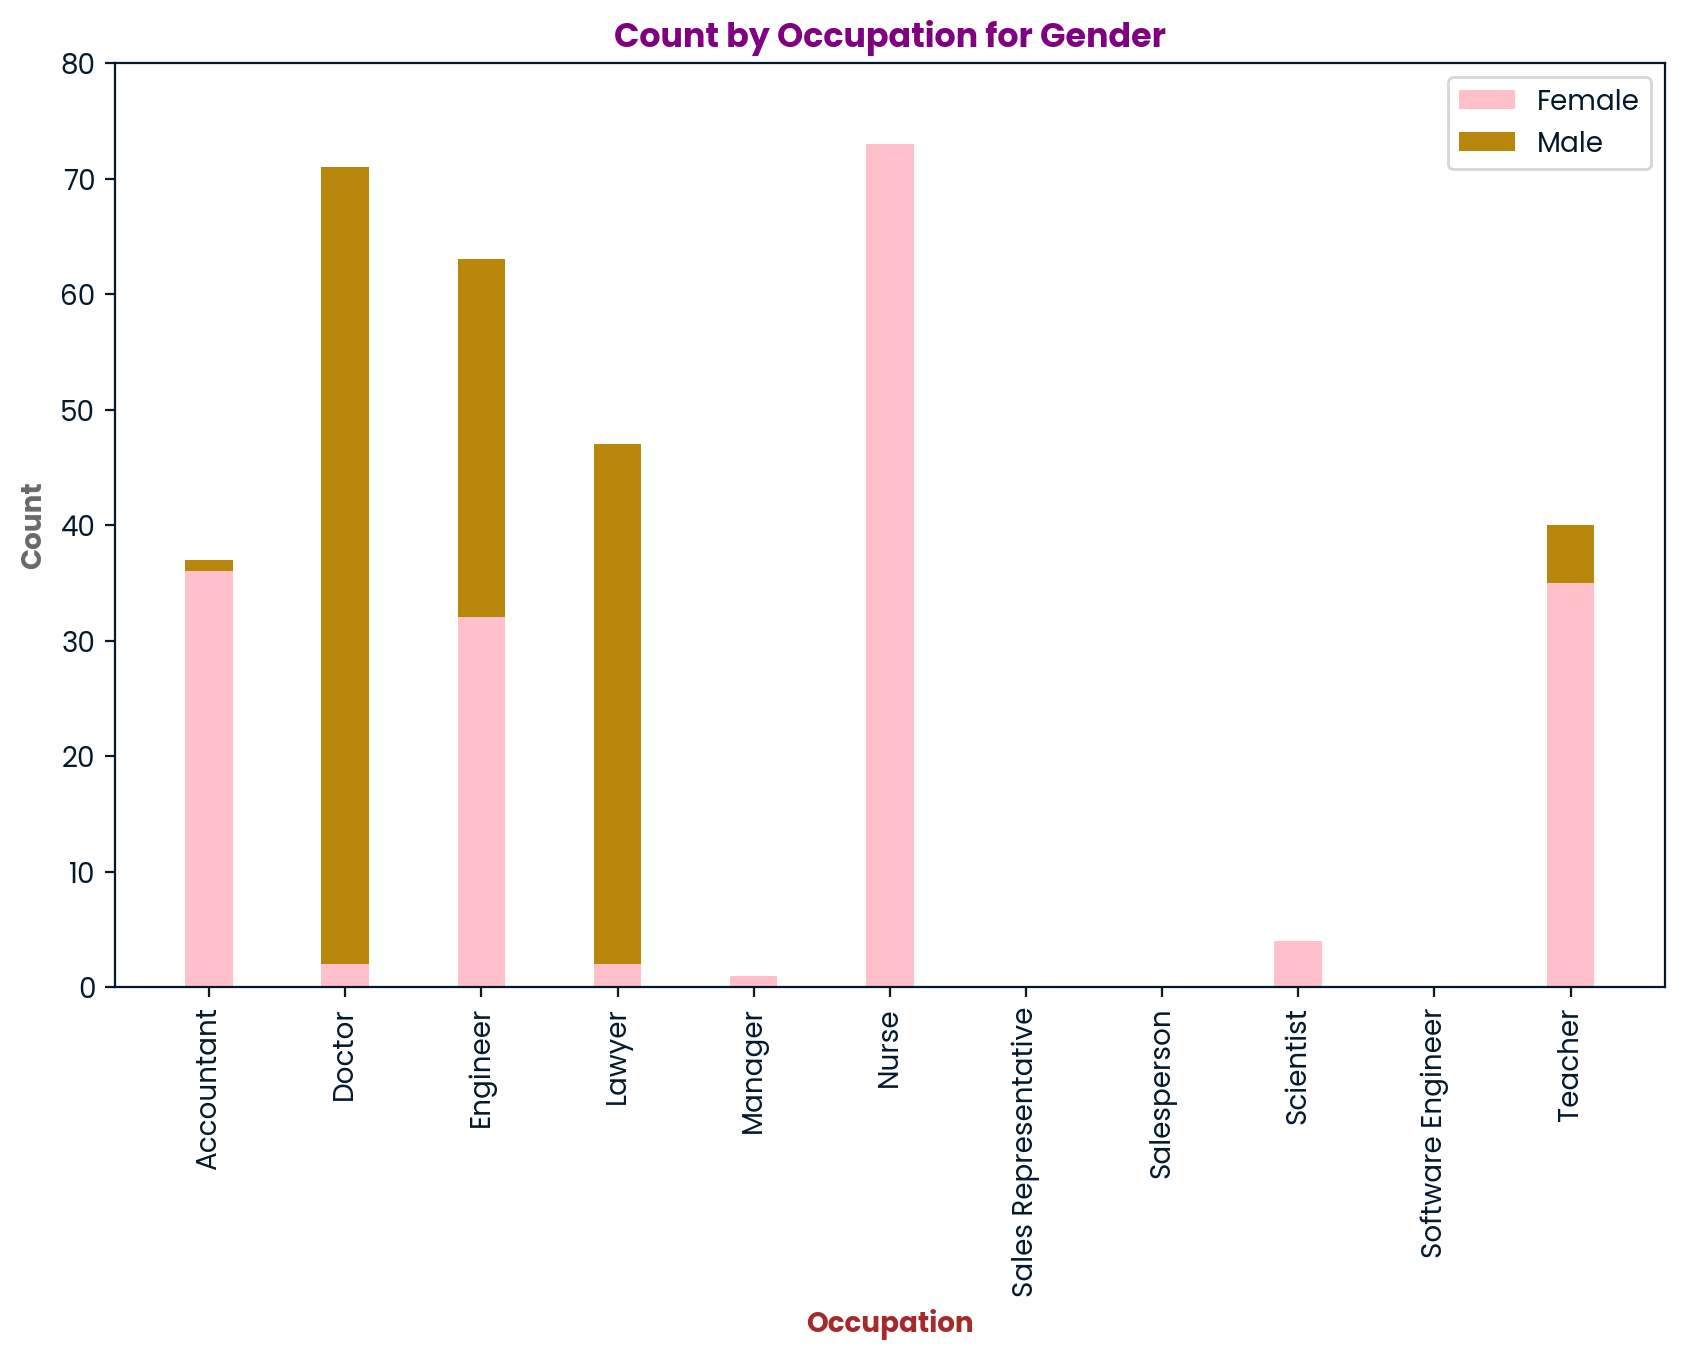

In [13]:
# Create a bar plot with stacked bars using matplotlib
bar_width = 0.35
index = np.arange(len(data_summ.Occupation))

plt.figure(figsize=(10, 6))
# Adding the first bar
plt.bar(index, data_summ.Female, width=bar_width, label='Female', color='pink')
# Adding the second bar on top of first bar
plt.bar(index, data_summ.Male, width=bar_width, label='Male', color='darkgoldenrod', bottom = data_summ.Female)

# giving title to the plot
plt.title("Count by Occupation for Gender", weight = "bold", color = "purple")
 
# giving X and Y labels
plt.xlabel("Occupation", weight = "bold", color = "brown")
plt.ylabel("Count", weight = "bold", color = "dimgrey")

# Show the legend
plt.legend()

# Adjust the x-axis ticks and labels
plt.xticks(index, data_summ.Occupation, rotation = 90)

# Increasing ylim
plt.ylim((0,80))

# Show the plot
plt.show()

## Another way

In [14]:
# Summarising the data with separate column for Female & Male

data_summ = data.groupby(['Occupation', 'Gender'])['Person ID'].agg('count')
data_summ = data_summ.reset_index(name = "Count")

data_summ

,Occupation,Gender,Count
0,Accountant,Female,36
1,Accountant,Male,1
2,Doctor,Female,2
3,Doctor,Male,69
4,Engineer,Female,32
5,Engineer,Male,31
6,Lawyer,Female,2
7,Lawyer,Male,45
8,Manager,Female,1
9,Nurse,Female,73


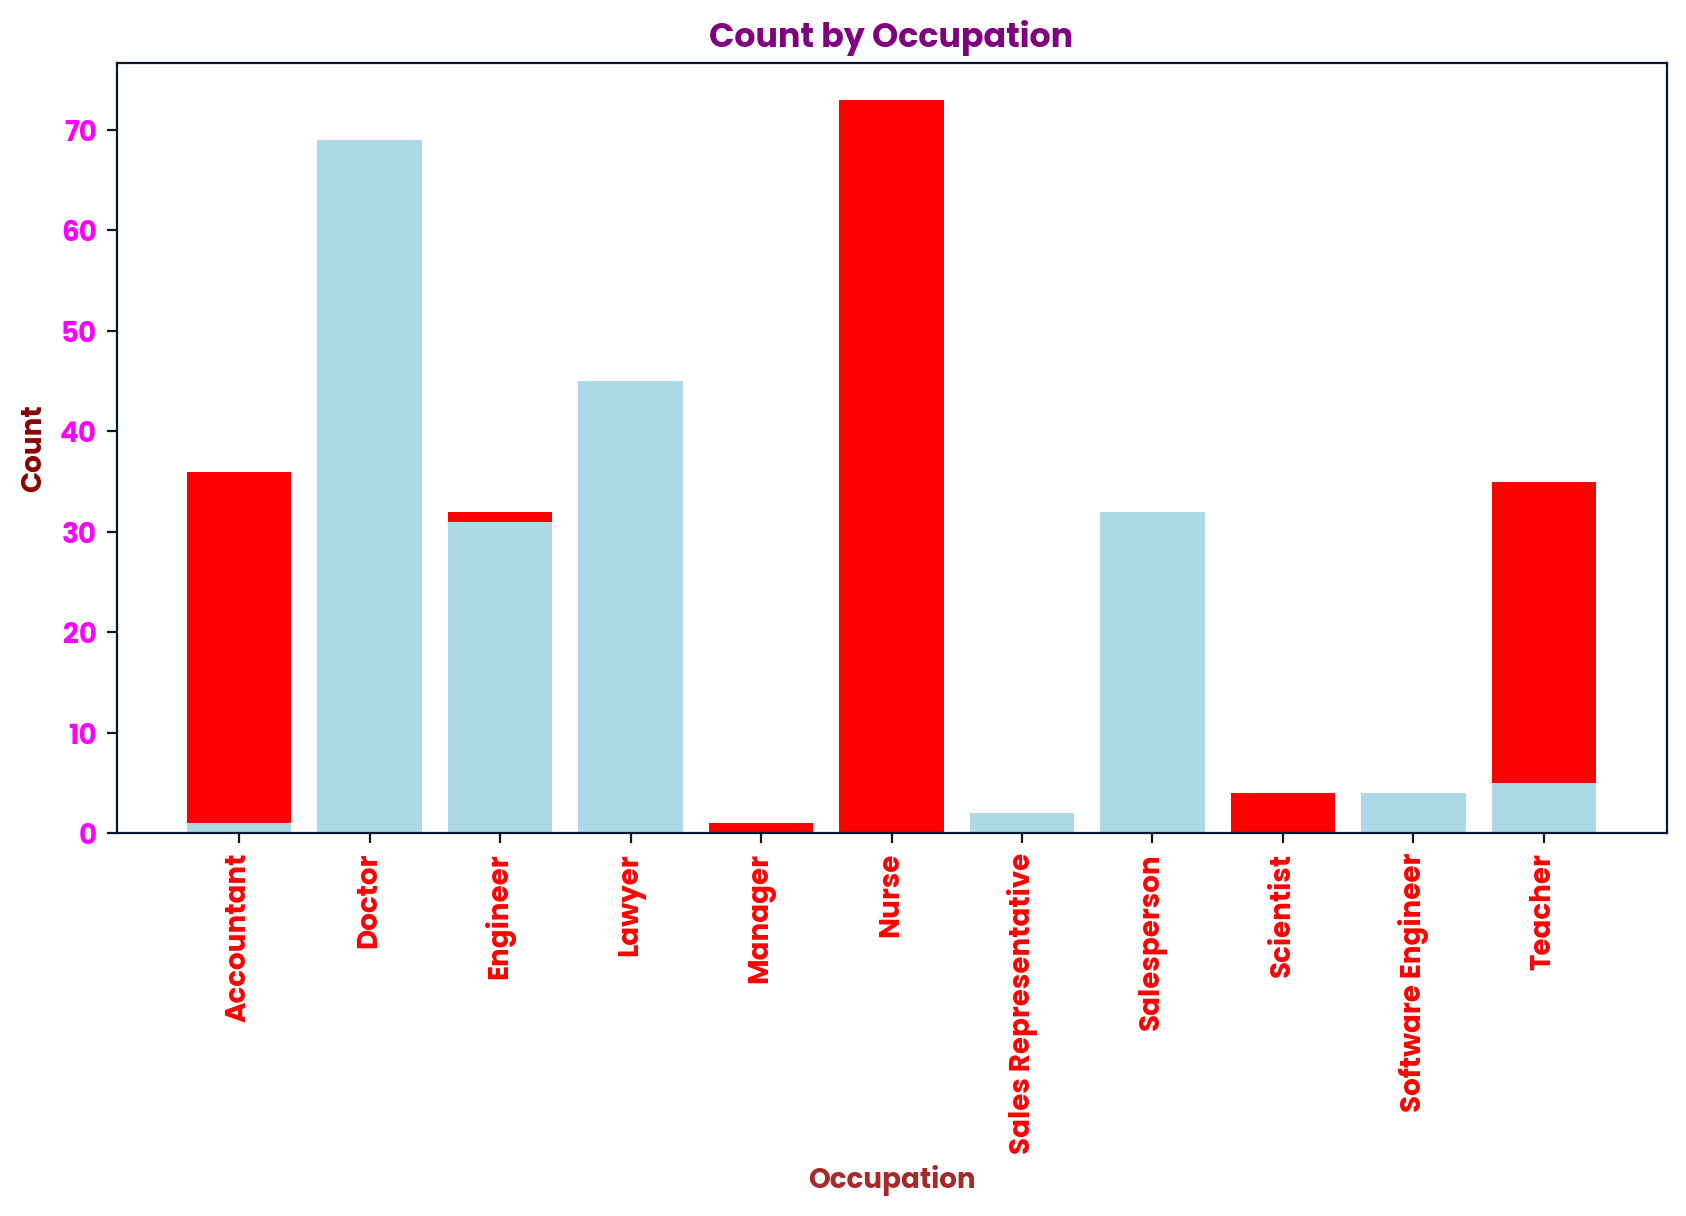

In [15]:

plt.figure(figsize=(10, 5))
plt.gca().set_facecolor("white")

plt.bar(data_summ.Occupation, data_summ.Count, 
        color=["red" if gender == "Female" else "lightblue" for gender in data_summ.Gender])

# giving title to the plot
plt.title("Count by Occupation", weight="bold", color="purple")
     
# giving X and Y labels
plt.xlabel("Occupation", weight="bold", color="brown")
plt.ylabel("Count", weight="bold", color="darkred")

# Modifying the ticks
plt.xticks(rotation=90, color="red", weight="bold")
plt.yticks(color="magenta", weight="bold")
  
# visualizing the plot
plt.show()

## Create a side by side bar plot Using Seaborn

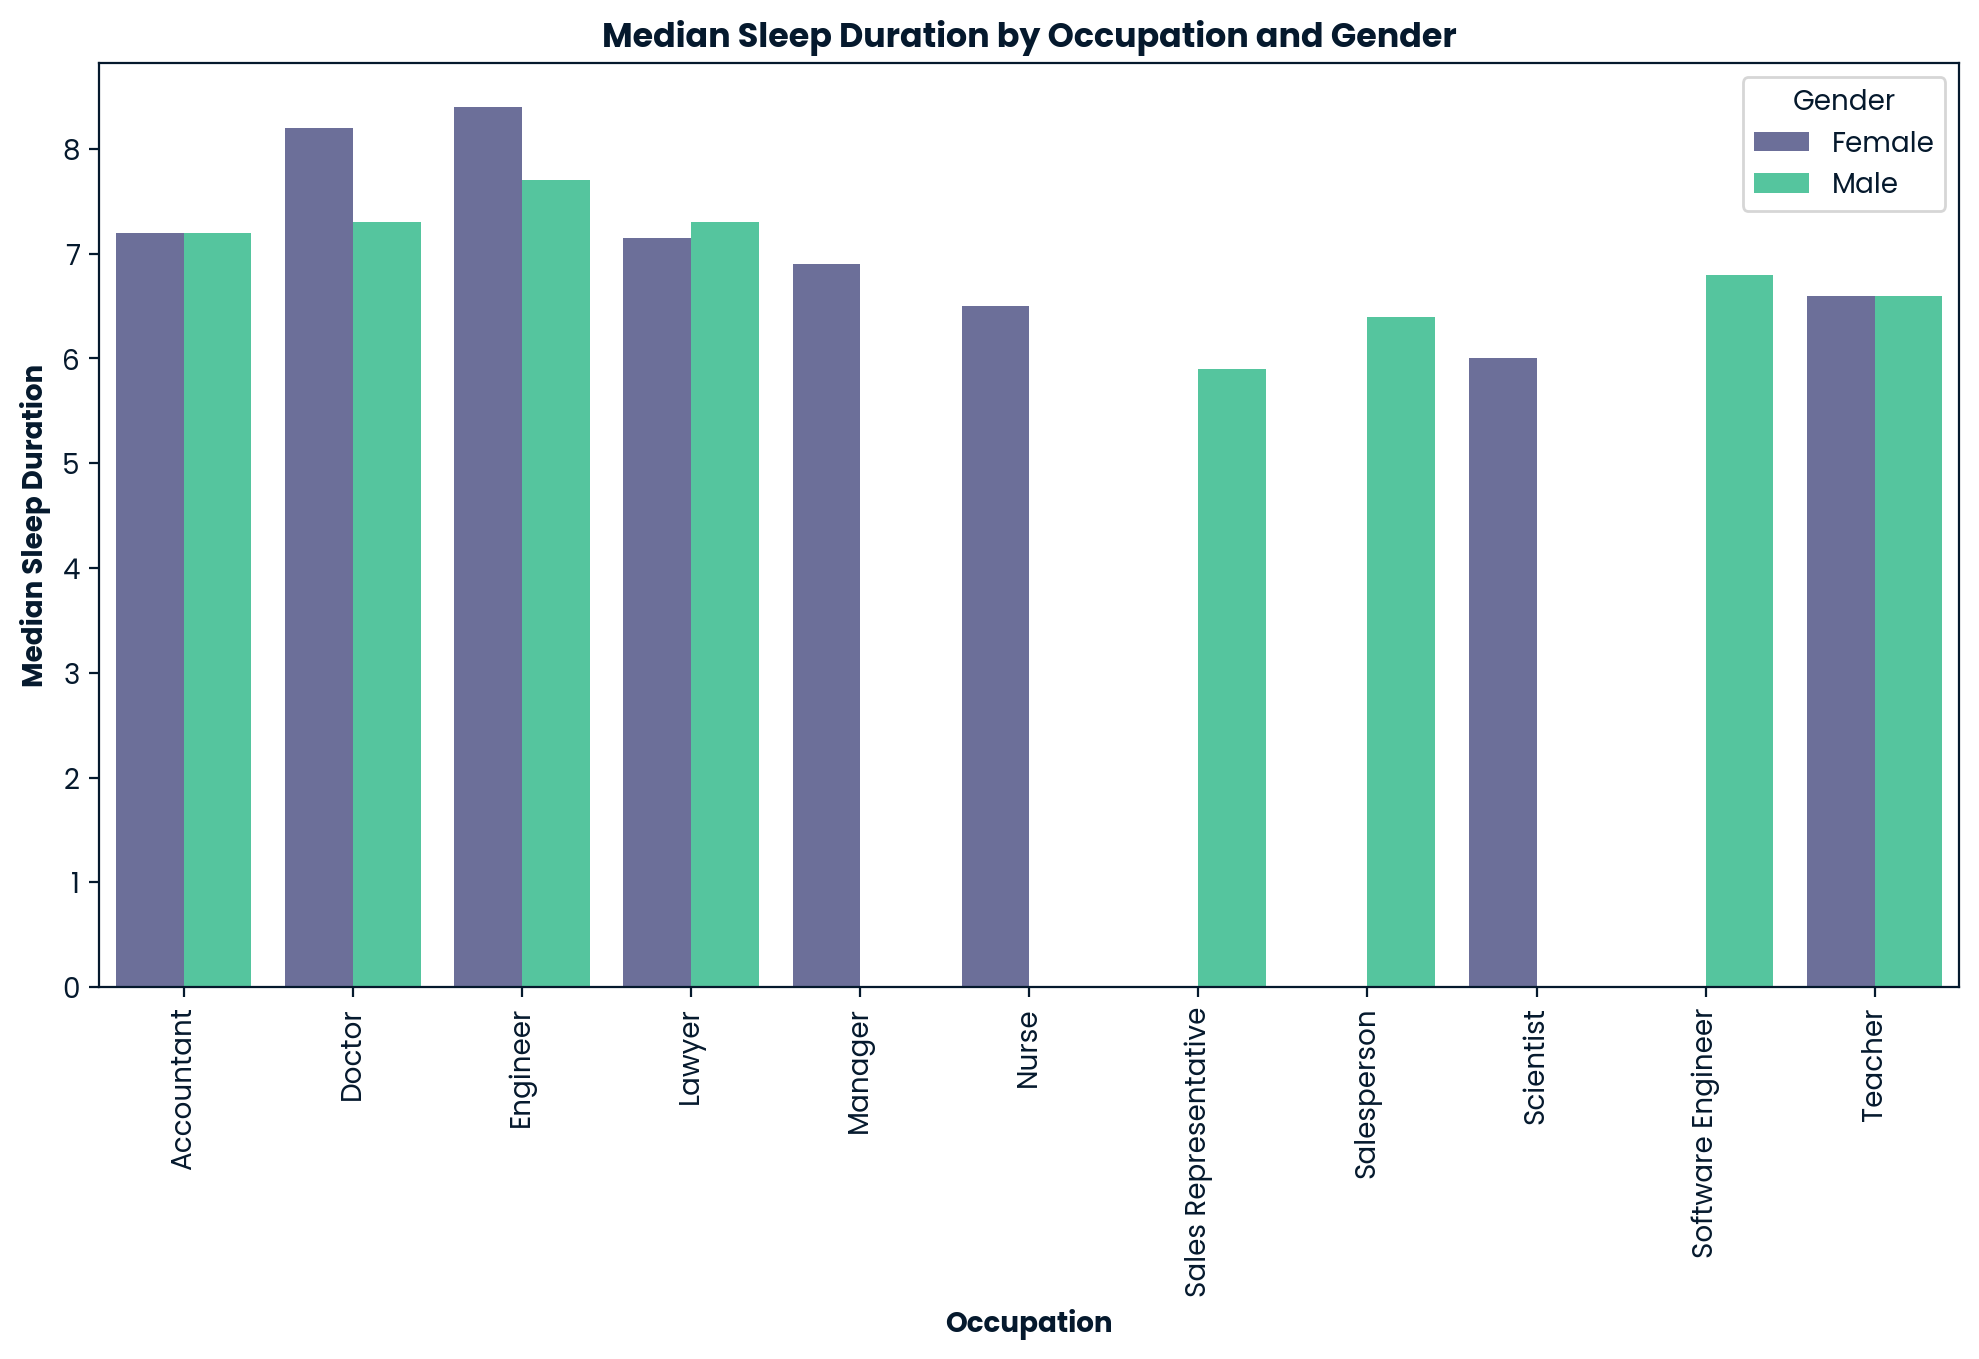

In [16]:
import seaborn as sns

# Calculate the median sleep duration by occupation and gender
median_sleep_duration = data.groupby(['Occupation', 'Gender'])['Sleep Duration'].median().reset_index()

# Create a bar plot with side by side bars for male and female
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Sleep Duration', hue='Gender', data=median_sleep_duration)

# Set the title and labels for the plot
plt.title('Median Sleep Duration by Occupation and Gender', weight='bold')
plt.xlabel('Occupation', weight='bold')
plt.ylabel('Median Sleep Duration', weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the legend
plt.legend(title='Gender')

# Show the plot
plt.show()